# **Querying Data with SQLite (Pt. 2)**

In this Jupyer Notebook, we demonstrate how to query an SQLite database using SQLAlchemy, process the results in Pandas, and visualize the data. We will query data from the `Dish` table, perform data grouping and aggregation, visualize the aggregated data using a bar plot, use Pandas to perform similar operations on the queried data, and query additional data from a `Scene` table.

***

## **1. Setup**

### **1.1 ~ Import Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import sqlalchemy as db
import matplotlib.pyplot as plt

### **1.2 ~ Connect to the SQLite database**

In [2]:
# Create connection to the SQLite database
engine = db.create_engine('sqlite:///../data/SQL_basic_examples.db')
conn = engine.connect()

***

## **2. Querying Data from the 'Dish' Table**

### **2.1 ~ Selecting All Rows from the 'Dish' Table**

In [3]:
# Querying all rows from 'Dish' table and storing result in DataFrame
query = """
SELECT *
FROM Dish;
"""

df = pd.read_sql(query, conn)
display(df)

,name,type,cost
0,ravioli,entree,10
1,pork bun,entree,7
2,taco,entree,7
3,edamame,appetizer,4
4,fries,appetizer,4
5,potsticker,appetizer,4
6,ice cream,dessert,5


***

## **3. Grouping Data by Dish Type**

### **3.1 ~ Querying the Maximum Cost per Dish Type**

In [4]:
# Querying max cost per dish type and storing it in new DataFrame
query = """
SELECT type, MAX(cost) AS max_cost
FROM Dish
GROUP BY type;
"""

grouped = pd.read_sql(query, conn)
display(grouped)

,type,max_cost
0,appetizer,4
1,dessert,5
2,entree,10


***

## **4. Visualizing the Aggregated Data**

### **4.1 ~ Bar Plot of Maximum Cost by Dish Type**

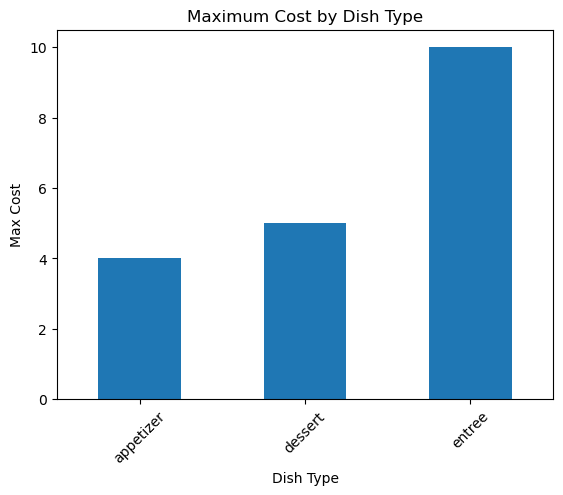

In [5]:
# Visualizing the maximum cost by dish type using bar plot
grouped.set_index('type', inplace=True)
grouped.plot(kind="bar", legend=False, title="Maximum Cost by Dish Type")
plt.ylabel("Max Cost")
plt.xlabel("Dish Type")
plt.xticks(rotation=45)
plt.show()

***

## **5. Using Pandas for Grouping and Aggregation**

### **5.1 ~ Performing the Group By Operation with Pandas**

In [6]:
# Performing the same grouping and aggregation using pandas
query = """
SELECT *
FROM Dish;
"""

pandas_grouped = df.groupby("type")["cost"].agg("max")
display(pandas_grouped)

type
appetizer     4
dessert       5
entree       10
Name: cost, dtype: int64

***

## **6. Querying the 'Scene' Table**

### **6.1 ~ Selecting All Rows from the 'Scene' Table**

In [7]:
# Querying all rows from 'Scene' table and storing result in DataFrame
query = """
SELECT *
FROM Scene;
"""

df = pd.read_sql(query, conn)
display(df)

,id,biome,city,visitors,created_at
0,1,desert,Las Vegas,100,2021-01-01
1,2,ocean,Hawaii,1000,2021-01-02
2,3,river,Paris,50,2021-01-05
3,4,hotel,Iceland,1,2021-01-07
4,5,desert,Austin,25,2021-01-12
5,6,hotel,Las Vegas,240,2021-01-15
6,7,hotel,Paris,100,2021-01-15
